In [26]:
import numpy as np # linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('Social_Network_Ads.csv')

In [28]:
df.sample(5)

,Age,EstimatedSalary,Purchased
70,25,80000,0
276,38,71000,0
68,22,63000,0
385,56,60000,1
242,50,88000,1


# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

In [30]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [35]:
# X_train

In [38]:
# X_train_scaled

In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [39]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [40]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

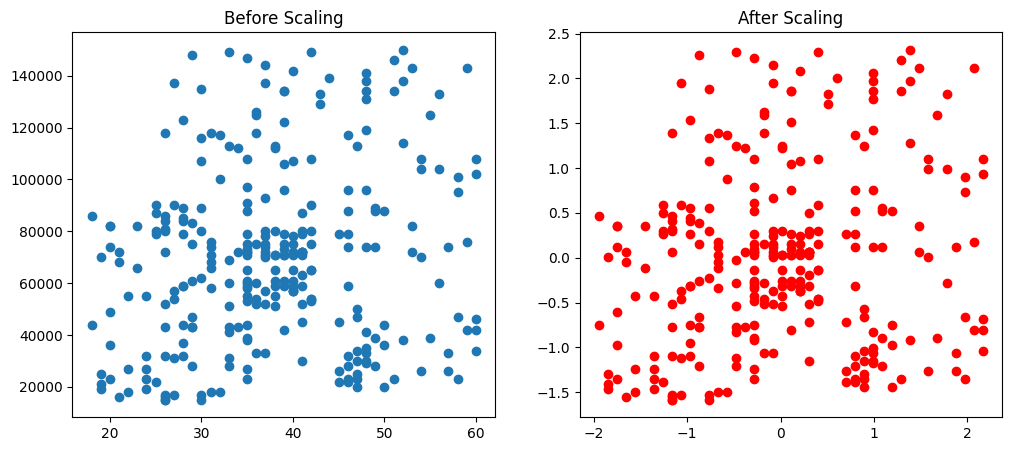

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')
plt.show()

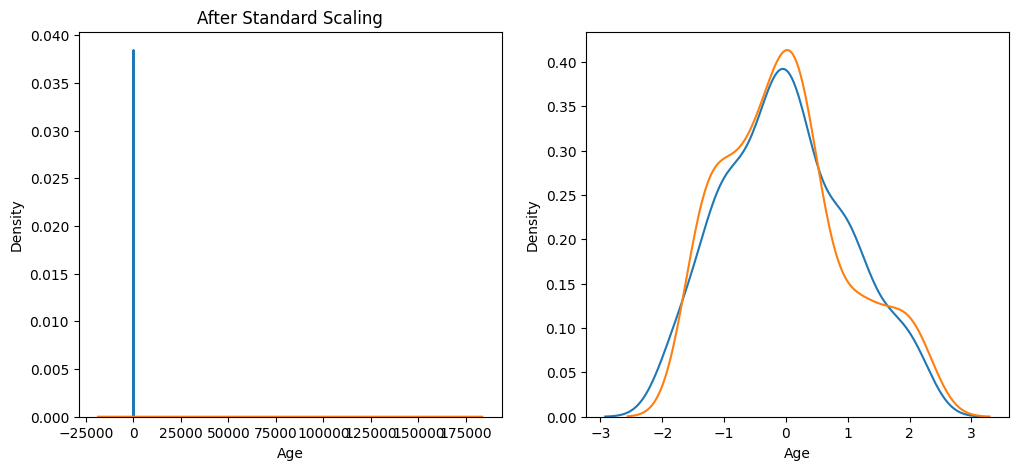

In [47]:
# Plotting PDF(Probability Density Function) of Age and Salary

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= (12,5))

# before scaling

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling

ax1.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

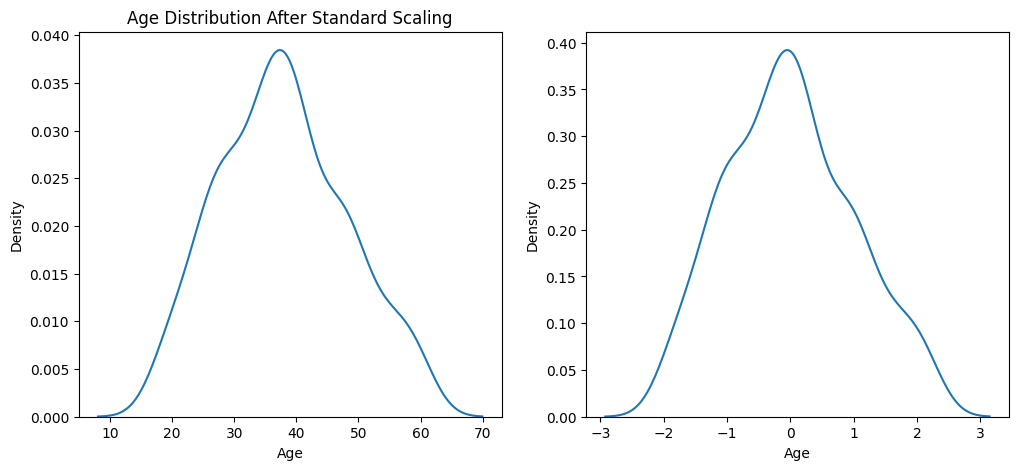

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= (12,5))

# before scaling

ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling

ax1.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

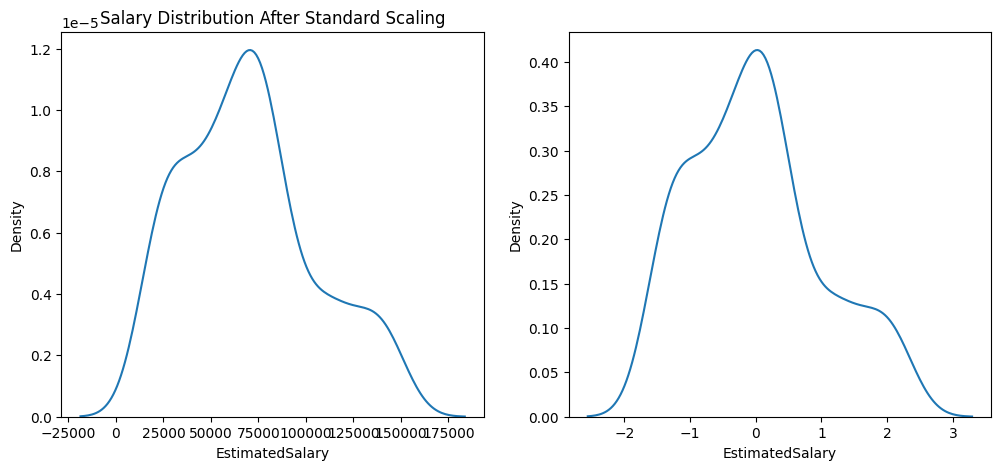

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= (12,5))

# before scaling

ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling

ax1.set_title('Salary Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why Scaling is Important ?

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [53]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [54]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [55]:
from sklearn.metrics import accuracy_score 

In [56]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [59]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [60]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [61]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.875


### Notes:- It means using Standardizatin in Decision tree have no impact on our data. We can use Standardization or we can not used it. It totaly depends on us.

In [62]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [75]:
# We are creating outliers in our dataset.

# df = df.append(pd.DataFrame({'Age':[5, 90, 95], 'EstimatedSalary':[1000, 250000, 350000], 'Purchased':[0,1,1]}), ignore_index=True)

# df.append() method is not working in latest pandas version so i added value manually in latest file 'Social_Network_Ads_with_Outliers.csv'

df_outliers = pd.read_csv('Social_Network_Ads_with_Outliers.csv')

In [76]:
df_outliers

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


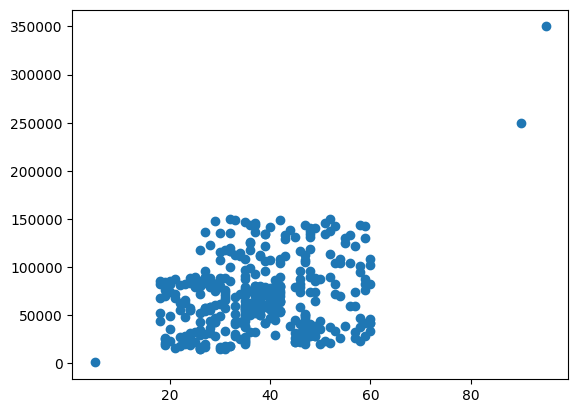

In [77]:
plt.scatter(df_outliers['Age'], df_outliers['EstimatedSalary'])

# Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_outliers.drop('Purchased', axis=1), df_outliers['Purchased'], test_size=0.3, random_state=0)

In [79]:
X_train.shape, X_test.shape

((282, 2), (121, 2))

# Stadardization

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

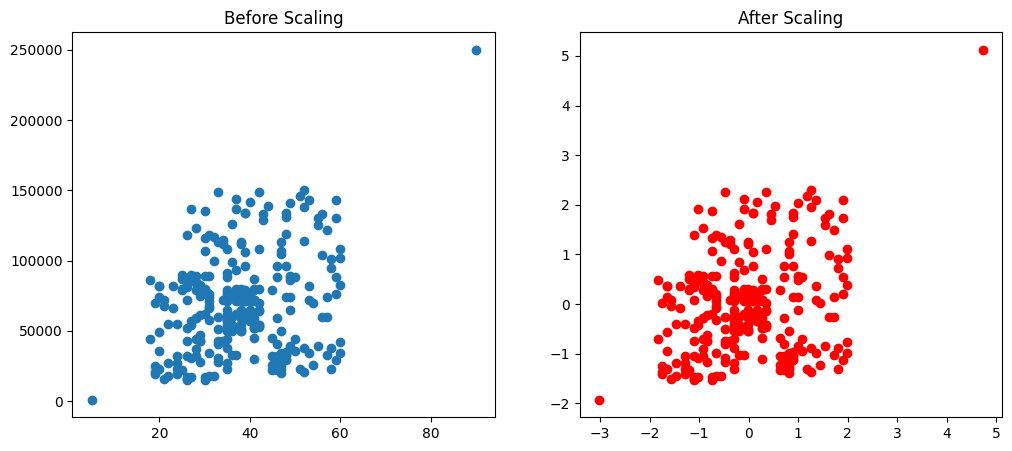

In [82]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')
plt.show()

### Note:- In the above Image we are seeing 2 Outlier, 1 Outier has gone in test data so don't need to be confused. But we can see that Outlier is Outlier(behaving like Outliers) till now after Standardization. It means Standardization does not reduce the impact of outliers. This is the main thing that we have to notice, When we are putting Standardization in Outlier Columns then it does not reduce the Outlier Impacts, Outlier behaves likes as outliers. So we have to handle Outliers explicitly(seperately).
